# Diffusion model synthetic load data example


This notebook introduces an example of using the Diffusion model to synthesize a single appliance load data..

In [1]:
import os
import torch
import numpy as np
from engine.solver import Trainer
from Utils.metric_utils import visualization
from Data.build_dataloader import build_dataloader
from Utils.io_utils import load_yaml_config, instantiate_from_config
from Models.diffusion.model_utils import unnormalize_to_zero_to_one
import pandas as pd
import matplotlib.pyplot as plt

## Setting and Training

In [2]:
applianceName='kettle'

In [3]:
Ftime_series =df = pd.read_csv(f'Data/datasets/{applianceName}.csv')
mydata = df['power'].values.reshape(-1, 1)

In [4]:
print(mydata.max())

1.0


### Setting up the appliance generation configuration

In [5]:
class Args_Appliance:
    def __init__(self) -> None:
        self.config_path = f'./Config/{applianceName}.yaml'
        self.save_dir = './Synthetic_data'
        self.gpu = 0
        os.makedirs(self.save_dir, exist_ok=True)

args =  Args_Appliance()
configs = load_yaml_config(args.config_path)
device = torch.device(f'cuda:{args.gpu}' if torch.cuda.is_available() else 'cpu')

dl_info = build_dataloader(configs, args)
model = instantiate_from_config(configs['model']).to(device)
trainer = Trainer(config=configs, args=args, model=model, dataloader=dl_info)

### Training models

In [6]:
trainer.train()

  0%|          | 0/20000 [00:00<?, ?it/s]

c:\Users\Raymond Tie\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


KeyboardInterrupt: 

## Load synthesis and visual comparison

### Sampling

In [ ]:
torch.cuda.empty_cache()
dataset = dl_info['dataset']
seq_length, feature_dim = dataset.window, dataset.var_num
fake_data = trainer.sample(num=200, size_every=200, shape=[seq_length, feature_dim])
if dataset.auto_norm:
    fake_data = unnormalize_to_zero_to_one(fake_data)
    np.save(os.path.join(args.save_dir, f'generate_fake_{applianceName}.npy'), fake_data)

### Visualization

Visual comparison of synthesis effects

In [ ]:
print(fake_data[0].shape)

arr1 = fake_data.flatten()
arr2 = mydata.flatten()

plt.figure(figsize=(8, 4))
plt.plot(arr1[:10000], color='b', label='fake')
plt.plot(arr2[:10000], color='r', label='real')
plt.title('Real and synthetic electrical power comparison')
plt.xlabel('time')
plt.ylabel('power')
plt.legend()
plt.show()

In [ ]:
arr1 = fake_data.flatten()
arr2 = mydata.flatten()

fig, axs = plt.subplots(2, figsize=(8, 8))

axs[0].plot(arr1[10000:20000], linestyle='-', color='b', label='fake')
axs[0].set_title('generate dishwasher')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('power')
axs[0].legend()

axs[1].plot(arr2[0:10000], linestyle='-', color='r', label='real')
axs[1].set_title('origin dishwasher')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('power')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
print(fake_data.shape)
print(ori_data.shape)

In [ ]:
fake_data.flatten()

In [ ]:
flattened_data=arr1
df = pd.DataFrame(flattened_data, columns=['power'])
df.to_csv(f'generatedData/MinMaxgenerate{applianceName}.csv', index=False)

(42800, 512, 1)


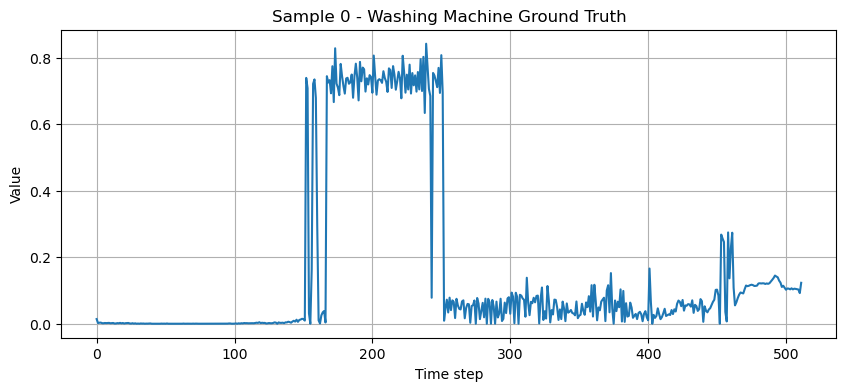

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\Raymond Tie\Desktop\DiffusionModel_NILM\OUTPUT\washingmachine_512\ddpm_fake_washingmachine_512.npy"

# ← YOU'RE MISSING THIS LINE:
data = np.load(file_path)

print(data.shape)   # (95904, 512, 1)

sample = data[0].squeeze()   # → shape becomes (512,)

plt.figure(figsize=(10,4))
plt.plot(sample)
plt.title("Sample 0 - Washing Machine Ground Truth")  # Also fixed the title
plt.xlabel("Time step")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
#Calculate the mean, max power of fridge in building two of ukdale
